# Visualize Sentiment WordCloud

In [1]:
import re
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import nltk
from nltk.corpus import stopwords
stop_words = stopwords.words("english")
from pattern.en import lemma

import pandas as pd
import numpy as np
from wordcloud import WordCloud
from collections import defaultdict, Counter

import matplotlib.pyplot as plt

In [4]:
review = pd.read_csv("../data/reviews_with_sentiment.csv")
print(review.shape)

(1707861, 12)


## Positive Reviews

In [5]:
positive = review[review['positive'] >= 0.999].copy()
print(positive.shape)

(2645, 12)


In [6]:
def make_ngram_string(df, n):
    all_text_ngram = []
    for l in df['text_processed']:
        for i in range(n, len(l)):
            ngram = "_".join([l[i-ii] for ii in range(n-1, -1, -1)])
            all_text_ngram.append(ngram)
    return " ".join(all_text_ngram)

In [7]:
def preprocess_text(df):
        ## Remove special characters
    df['text_processed'] = df['text'].map(lambda x: re.sub('[,\.!?]', '', x))

    # lowercases, tokenizes, de-accents 
    def sent_to_words(sentences):
        for sentence in sentences:
            # deacc=True removes punctuations
            yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
    df['text_processed'] = list(sent_to_words(df['text_processed']))
    print("Gensim Preprocessed Done")

    # Remove stopwords
    %timeit df['text_processed'] = df['text_processed'].apply(lambda x: [w for w in x if w not in stop_words])
    print("Removed stopwords done")

    # Lemmatize
    df['text_processed'] = df['text_processed'].apply(lambda x: [lemma(w) for w in x])
    print("Lemmatized Done")

    # Remove stopwords
    %timeit df['text_processed'] = df['text_processed'].apply(lambda x: [w for w in x if w not in stop_words])
    print("Removed stopwords done")
    
    return df

In [9]:
positive = preprocess_text(positive)

Gensim Preprocessed Done
156 ms ± 2.94 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Removed stopwords done
Lemmatized Done
151 ms ± 3.36 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Removed stopwords done


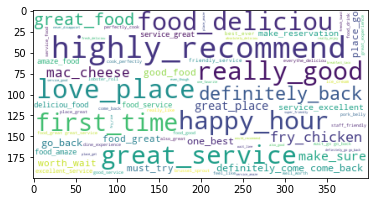

In [26]:
all_text_positive = make_ngram_string(positive, 2)
wordcloud_positive = WordCloud(background_color="white", max_words=500, contour_width=3, contour_color='steelblue', random_state=48)
wordcloud_positive.generate(all_text_positive)
plt.imshow(wordcloud_positive)

## Negative Reviews

In [11]:
negative = review[review['negative'] >= 0.998].copy()
print(negative.shape)

(738, 12)


In [12]:
negative = preprocess_text(negative)

Gensim Preprocessed Done
61.2 ms ± 1.49 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Removed stopwords done
Lemmatized Done
58.4 ms ± 1.43 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Removed stopwords done


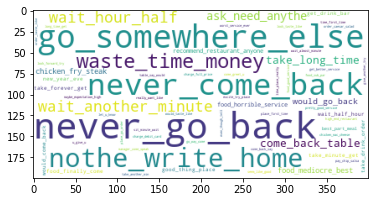

In [22]:
all_text_negative =  make_ngram_string(negative, 3)
wordcloud_negative = WordCloud(background_color="white", max_words=500, contour_width=3, contour_color='steelblue', random_state=48)
wordcloud_negative.generate(all_text_negative)
plt.imshow(wordcloud_negative)

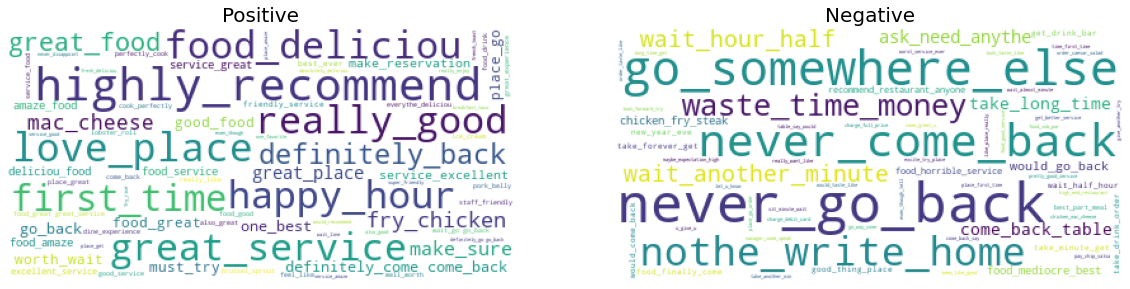

In [43]:
fig, axes = plt.subplots(1, 2, figsize = (20, 8))
ax = axes[0]
plt.imshow(wordcloud_positive)
ax.set_title("Positive", fontsize = 20)
ax.set_axis_off()
ax.imshow(wordcloud_positive)

ax = axes[1]
plt.imshow(wordcloud_negative)
ax.set_title("Negative", fontsize = 20)
ax.imshow(wordcloud_negative)
ax.set_axis_off()
plt.savefig("../plots/sentiment_wordcloud.png", bbox_inches='tight', pad_inches=0)
plt.show()